In [1]:
Output = ('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1001. InVitroWildfire EVProteomics/P1001.3. Analyses/P1001.3.6. Volcano Plot/Output')
cur_date = "070922"

library(readxl)
library(tidyverse)
library(reshape2)
library(ggrepel)
library(MetBrewer)

#reading in file
protein_df = data.frame(read_excel("Input/070122_Statistical_Results_Only.xlsx")) %>%
    mutate(Treatment = ifelse(Treatment == "CoCulture", "Co-Culture", "Tri-Culture"))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [2]:
head(protein_df)

,Set,Treatment,Protein,Gene.name,log2FC,Statistic,P.Value,P.Adj
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Set1,Co-Culture,P02769,SWISS-PROT:P02769 (Bos taurus) Bovine serum albumin precursor,0.17688542,-1.5797374,0.1452796,0.6500055
2,Set1,Co-Culture,P02751,FN1,-0.09664782,0.3712160,0.7217335,0.9026101
3,Set1,Co-Culture,P12763,SWISS-PROT:P12763 (Bos taurus) Alpha-2-HS-glycoprotein precursor,0.04137128,-0.8905752,0.3980407,0.8425572
4,Set1,Co-Culture,Q2UVX4,SWISS-PROT:Q2UVX4 (Bos taurus) Complement C3 precursor,-0.01086488,0.2071797,0.8409804,0.9511124
5,Set1,Co-Culture,P98160,HSPG2,-0.37199408,1.3220928,0.2155840,0.7205621
6,Set1,Co-Culture,P12111,COL6A3,0.25760674,-1.5293073,0.1735218,0.6683300


In [3]:
# adding a col to denote whether a protein had a significant p adjust value, log FC, or both

# add a column of NAs
protein_df$diffexpressed <- "No Significance"

# if log2FC is significant only
protein_df$diffexpressed[abs(protein_df$log2FC) > abs(log2(1.5)) & protein_df$P.Adj > 0.1] <- "log2 FC Only"

# if p adjust is significant only
protein_df$diffexpressed[abs(protein_df$log2FC) < abs(log2(1.5)) & protein_df$P.Adj < 0.1] <- "P Adjust Only"

# if log2FC > log2(1.5) and P.Adj < 0.05, set as "UP" 
protein_df$diffexpressed[abs(protein_df$log2FC) > abs(log2(1.5)) & protein_df$P.Adj < 0.1] <- "P Adjust and log2 FC"

# making into a factor
protein_df$diffexpressed = factor(protein_df$diffexpressed, levels = c("No Significance", "log2 FC Only", 
                                                                       "P Adjust Only", "P Adjust and log2 FC"))
# viewing df
head(protein_df)

,Set,Treatment,Protein,Gene.name,log2FC,Statistic,P.Value,P.Adj,diffexpressed
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,Set1,Co-Culture,P02769,SWISS-PROT:P02769 (Bos taurus) Bovine serum albumin precursor,0.17688542,-1.5797374,0.1452796,0.6500055,No Significance
2,Set1,Co-Culture,P02751,FN1,-0.09664782,0.3712160,0.7217335,0.9026101,No Significance
3,Set1,Co-Culture,P12763,SWISS-PROT:P12763 (Bos taurus) Alpha-2-HS-glycoprotein precursor,0.04137128,-0.8905752,0.3980407,0.8425572,No Significance
4,Set1,Co-Culture,Q2UVX4,SWISS-PROT:Q2UVX4 (Bos taurus) Complement C3 precursor,-0.01086488,0.2071797,0.8409804,0.9511124,No Significance
5,Set1,Co-Culture,P98160,HSPG2,-0.37199408,1.3220928,0.2155840,0.7205621,No Significance
6,Set1,Co-Culture,P12111,COL6A3,0.25760674,-1.5293073,0.1735218,0.6683300,No Significance


# Volcano Plot

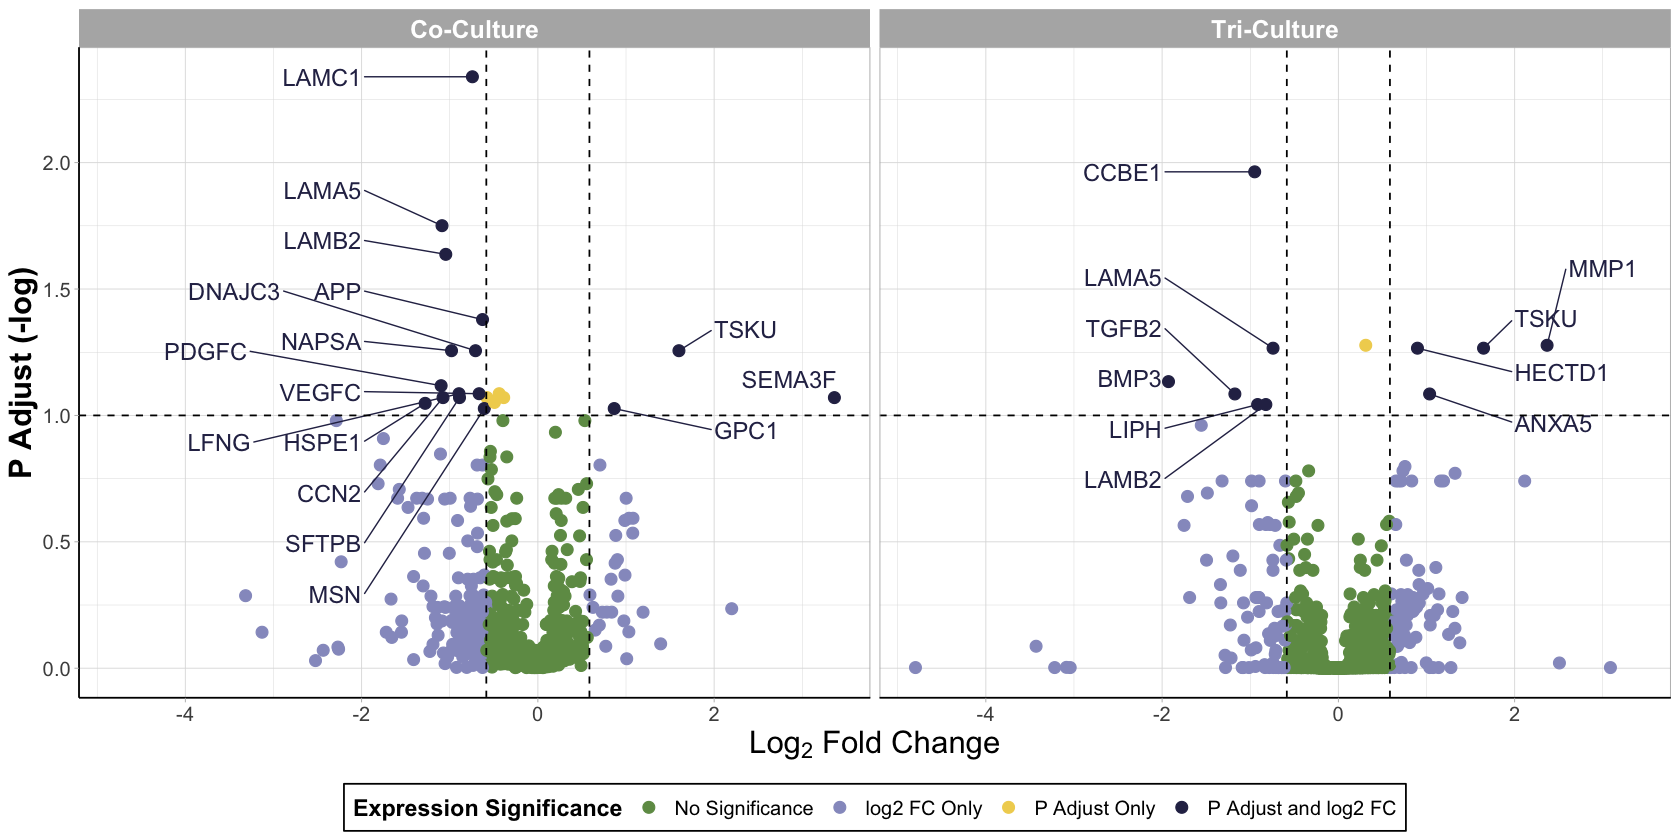

In [10]:
options(repr.plot.width=14, repr.plot.height=7) #changing size

#choosing palette from package
metbrewer_colors = MetPalettes$VanGogh1[[1]]

Figure6 = ggplot() + 
  geom_point(data = protein_df, aes(x = log2FC, y = -log10(P.Adj), color = diffexpressed), size = 3) + 

  #labeling points with statistical significance and FC
  geom_text_repel(data = protein_df %>%
                      filter(log2FC > log2(1.5) & diffexpressed == "P Adjust and log2 FC"), 
    aes(x = log2FC, y = -log10(P.Adj), label = Gene.name, color = diffexpressed),
    xlim = c(2, NA),
    hjust = 0,
    segment.size = 0.4,
     box.padding = 0.7,
     max.overlaps = Inf,
    size = 5, 
    show.legend = FALSE) + 

  geom_text_repel(data = protein_df %>%
                      filter(log2FC < log2(1.5) & diffexpressed == "P Adjust and log2 FC"), 
    aes(x = log2FC, y = -log10(P.Adj), label = Gene.name, color = diffexpressed),
    xlim = c(NA, -2),
    hjust = 1,
    segment.size = 0.4,
     box.padding = 0.7,
     max.overlaps = Inf,
    size = 5, 
    show.legend = FALSE) + 
  # FC lines
  geom_vline(xintercept = log2(1.5), linetype = "dashed") + 
  geom_vline(xintercept = -log2(1.5), linetype = "dashed") + 
  # P Adjust lines
  geom_hline(yintercept = -log10(0.1), linetype = "dashed") + 

  facet_wrap(~Treatment) + 

  theme_light() + 
  theme(axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 14), #changes legend title
        legend.text = element_text(size = 12), #changes legend text
        legend.position = "bottom", # changing legend position
        legend.background = element_rect(colour = 'black', fill = 'white', linetype = 'solid'),
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  labs(x = expression(Log[2]*" Fold Change"), y = 'P Adjust (-log)') + 

  scale_color_manual(name = "Expression Significance",
                      values = c(metbrewer_colors[7], metbrewer_colors[4], '#F0D25E', metbrewer_colors[1]))

Figure6

In [ ]:
# exporting figure
ggsave(Figure6, 
       filename = 'Figure6.pdf',
       path = Output,
       width = 14, height = 7)